In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import math

In [2]:
set_folder = "Set11"

In [3]:
content = Image.open("Sets/"+set_folder+"/content.jpg")
style = Image.open("Sets/"+set_folder+"/style.png")

In [4]:
content_np = np.array(content)
style_np = np.array(style)

In [5]:
def find_ratio(content, style):
    return content.shape[1]/content.shape[0], style.shape[1]/style.shape[0] #length/height

In [6]:
c, s = find_ratio(content_np, style_np)

In [7]:
print(c,s)

0.6666666666666666 0.73046875


## Resizing Style Image (Centre Crop) to match content

In [8]:
def crop_style(image, ratio_con, ratio_style):
    global style
    h = image.shape[0]
    l = image.shape[1]
    nh = image.shape[0]
    nl = image.shape[1]
    new_r = ratio_style
    if ratio_con > ratio_style:
        while np.abs(new_r-ratio_con) > 0.001:
            nh -= 0.05
            new_r = nl/nh
            print(new_r)
    else:
        while np.abs(new_r-ratio_con) > 0.001:
            nl -= 0.05
            new_r = nl/nh
            print(new_r)
    nh, nl = round(nh, 2), round(nl, 2)
    
    # Crop Image
    style = style.crop(box = [(l-nl)//2, (h-nh)//2, l - (l-nl)//2, h - (h-nh)//2])

In [9]:
if np.abs(c-s) > 0.6:
    print("Incompatible. Resizing will result in loss of style data.")
elif c == s:
    pass
else:
    crop_style(style_np, c, s)

0.7304296875
0.7303906250000001
0.7303515625000001
0.7303125000000001
0.7302734375000002
0.7302343750000002
0.7301953125000002
0.7301562500000003
0.7301171875000003
0.7300781250000004
0.7300390625000004
0.7300000000000004
0.7299609375000005
0.7299218750000005
0.7298828125000005
0.7298437500000006
0.7298046875000006
0.7297656250000006
0.7297265625000007
0.7296875000000007
0.7296484375000007
0.7296093750000008
0.7295703125000008
0.7295312500000009
0.7294921875000009
0.7294531250000009
0.729414062500001
0.729375000000001
0.729335937500001
0.7292968750000011
0.7292578125000011
0.7292187500000011
0.7291796875000012
0.7291406250000012
0.7291015625000012
0.7290625000000013
0.7290234375000013
0.7289843750000014
0.7289453125000014
0.7289062500000014
0.7288671875000015
0.7288281250000015
0.7287890625000015
0.7287500000000016
0.7287109375000016
0.7286718750000016
0.7286328125000017
0.7285937500000017
0.7285546875000017
0.7285156250000018
0.7284765625000018
0.7284375000000018
0.7283984375000019
0.

In [10]:
content = content.resize(style.size, resample=Image.LANCZOS)

In [11]:
content.size

(855, 1280)

In [12]:
style.size

(855, 1280)

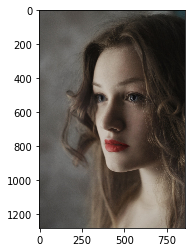

In [13]:
plt.imshow(np.asarray(content))

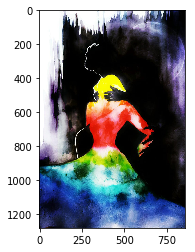

In [14]:
plt.imshow(np.asarray(style))

In [15]:
content.save("UpdatedSets/"+set_folder+"/content.jpg")
style.save("UpdatedSets/"+set_folder+"/style.png")